<a href="https://colab.research.google.com/github/Yash12100/Data_science/blob/master/Text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train= pd.read_csv('https://raw.githubusercontent.com/AFAgarap/ecommerce-reviews-analysis/master/Womens%20Clothing%20E-Commerce%20Reviews.csv')
train.rename(columns={'Age': 'age'})

In [0]:
train.drop('Unnamed: 0', axis=1, inplace=True)
print(train.columns)

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')


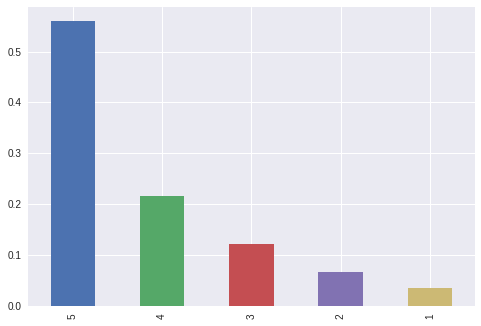

In [0]:
train['Rating'].value_counts(normalize=True).plot.bar()
plt.show()

In [0]:
train['Review_length']=train['Review Text'].astype(str).apply(lambda x: len(x))
review_rating=train.groupby(['Rating'])['Review_length'].mean()
print(review_rating)

Rating
1    296.627078
2    315.383387
3    322.001742
4    311.784321
5    284.883634
Name: Review_length, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


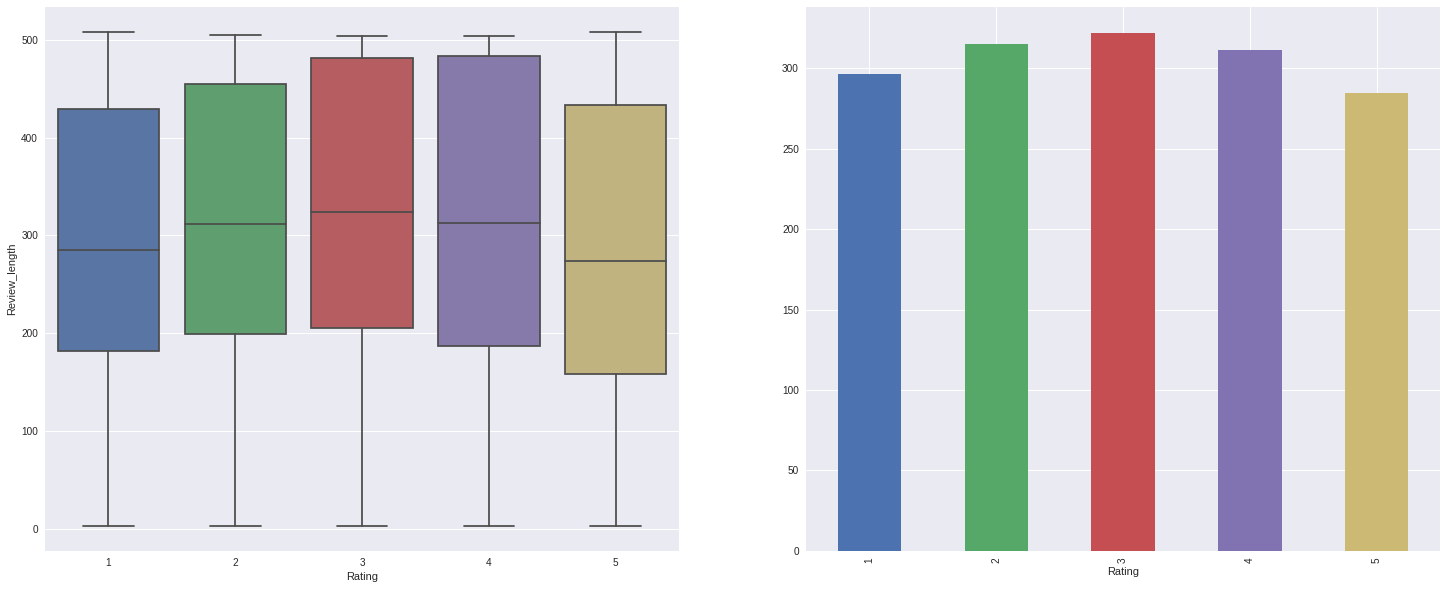

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.boxplot(x='Rating', y='Review_length', data=train)
plt.subplot(1,2,2)
review_rating.plot(kind='bar')
plt.show()

from the above it can be concluded that people with rating [2,3,4] have given longer reviews

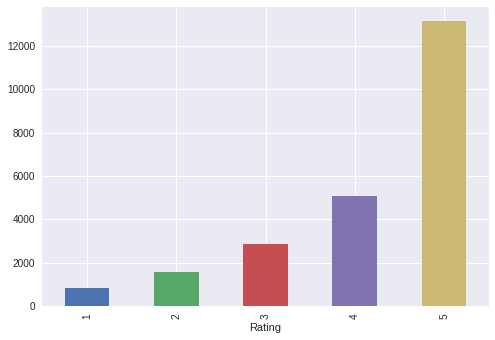

In [0]:
review_counts= train.groupby(['Rating'])['Review_length'].count()
review_counts.plot(kind='bar')
plt.show()

It states that most of the reviews are Good Reviews

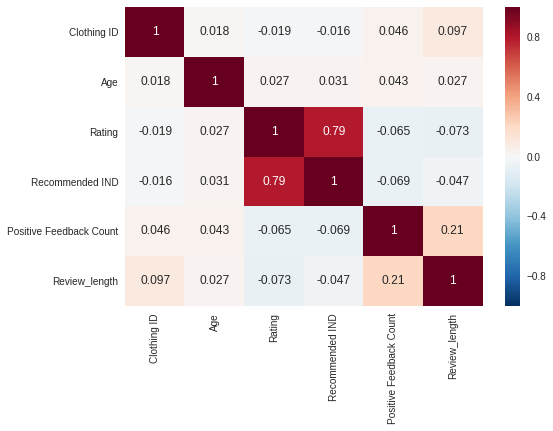

In [0]:
corr=train.corr()
sns.heatmap(data=corr,annot=True)

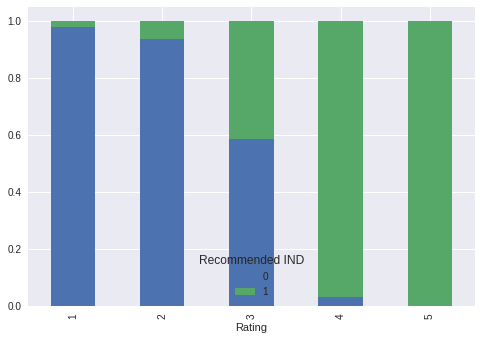

In [0]:
rating_recommended= pd.crosstab(train['Rating'],train['Recommended IND'])
rating_recommended.div(rating_recommended.sum(1).astype(float), axis=0).plot.bar(stacked=True)
plt.show()

There is high co-relation between Rating and Recommended IND

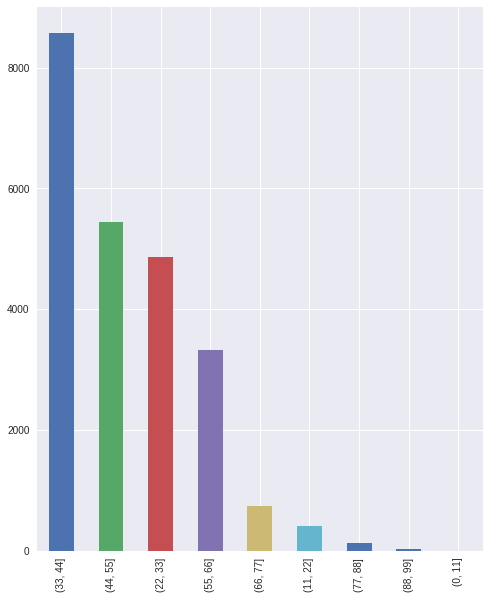

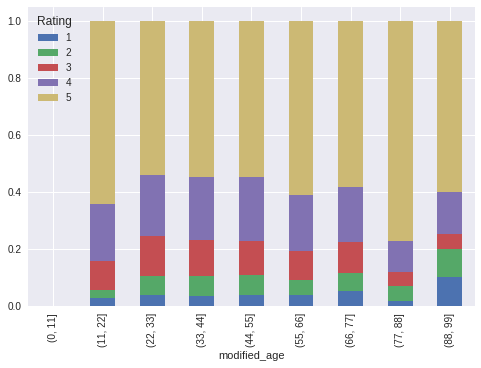

In [0]:
train['modified_age']=pd.cut(train['Age'], np.arange(0,100,11))
age_rating=pd.crosstab( train['modified_age'],train['Rating'])
plt.figure('age_division',figsize=(8,10))
train['modified_age'].value_counts().plot(kind='bar')
plt.figure('stacked',figsize=(10,10))
age_rating.div(age_rating.sum(1).astype(float),0).plot.bar(stacked=True)
plt.show()


In [0]:
#text= [str(v) for i in train['Review Text'] for v in i]
#print(text)
train['Review Text']= train['Review Text'].str.replace('[^\w\s]','')
train['Review Text']= train['Review Text'].apply( lambda x : ' '.join( i.lower() for i in str(x).split()))
train['Review Text']= train['Review Text'].apply( lambda x : ' '.join( i for i in str(x).split() if not i.isdigit()))
train['Review Text']= train['Review Text'].str.replace('  ','')
test=''.join(train['Review Text'].apply(lambda x: str(x)))

In [0]:
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

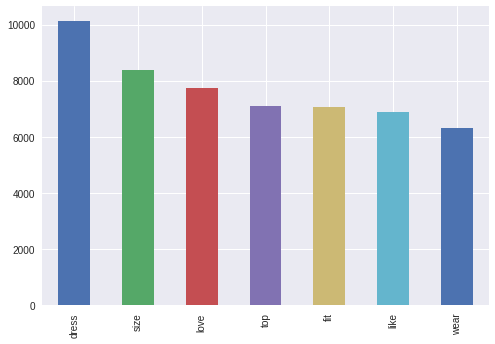

In [0]:
from nltk.corpus import stopwords

stop_words= stopwords.words('english')
filterd_data_1=pd.Series(x for x in test.split(' ') if not x in stop_words)
frequency_data=filterd_data_1.value_counts()[0:7]
frequency_data.plot(kind='bar')
plt.show()


(-0.5, 399.5, 199.5, -0.5)

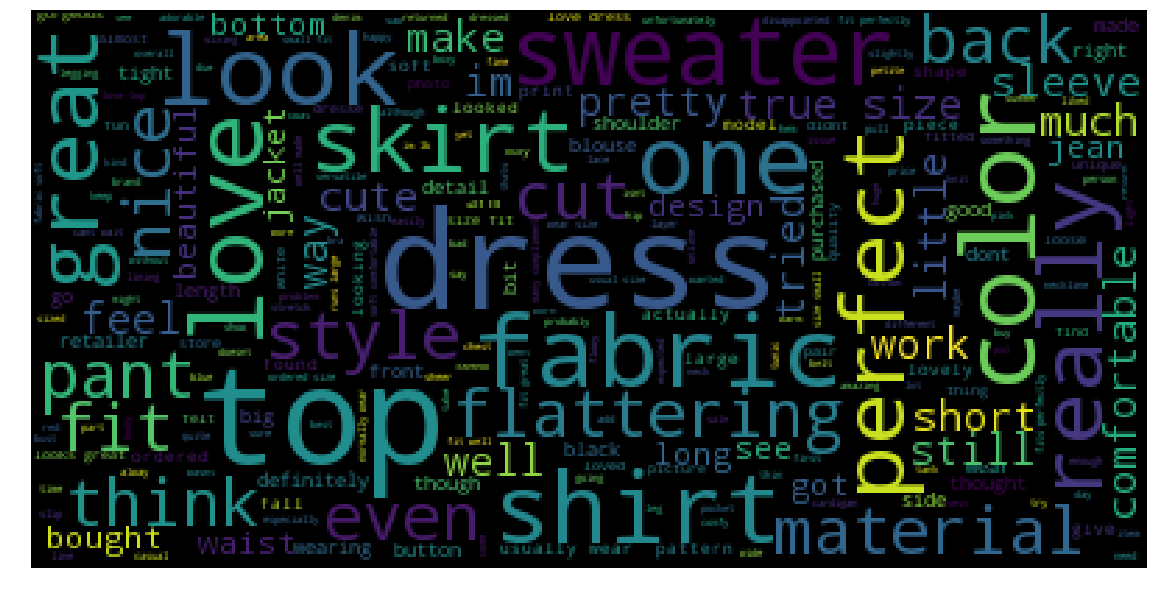

In [0]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc= WordCloud(background_color='black', max_font_size=50, max_words=1000)
wc.generate(' '.join(filterd_data_1))
plt.imshow(wc)
plt.axis('off')

In [0]:
from textblob import TextBlob

review=[]
polarity=[]
dict_1= {'reviews': review, 'polarities' : polarity}
review_polarity= pd.DataFrame.from_dict(dict_1)

for row in train['Review Text']:
  blob= TextBlob(row)
  review=[row]
  polarity=[blob.sentiment.polarity]
  dict_1= {'reviews': review, 'polarities' : polarity}
  review_polarity_1=pd.DataFrame.from_dict(dict_1)
  review_polarity=review_polarity.append(review_polarity_1)
  
print(review_polarity[0:5])

   polarities                                            reviews
0    0.633333  absolutely wonderful silky and sexy and comfor...
0    0.318750  love this dress its sooo pretty i happened to ...
0    0.076392  i had such high hopes for this dress and reall...
0    0.500000  i love love love this jumpsuit its fun flirty ...
0    0.393750  this shirt is very flattering to all due to th...


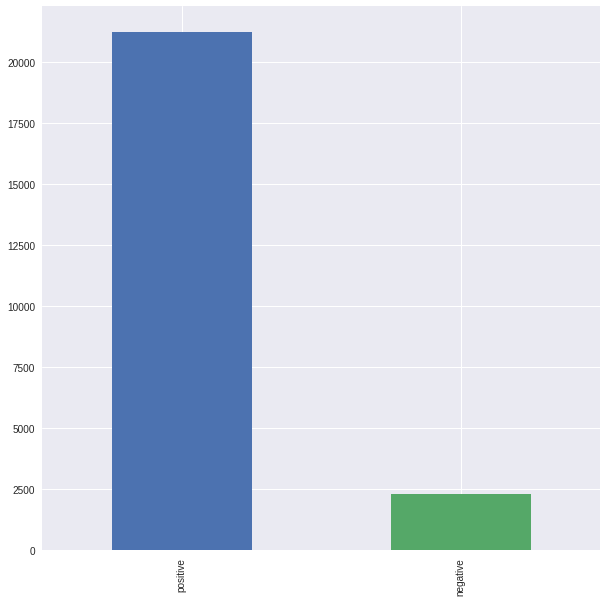

In [0]:
bins=[-1,0,1]
labels=['negative', 'positive']
reviews_plot=pd.cut(review_polarity['polarities'], bins=bins, labels=labels)
plt.figure(figsize=(10,10))
reviews_plot.value_counts().plot.bar()
plt.show()

 **Vectorization**

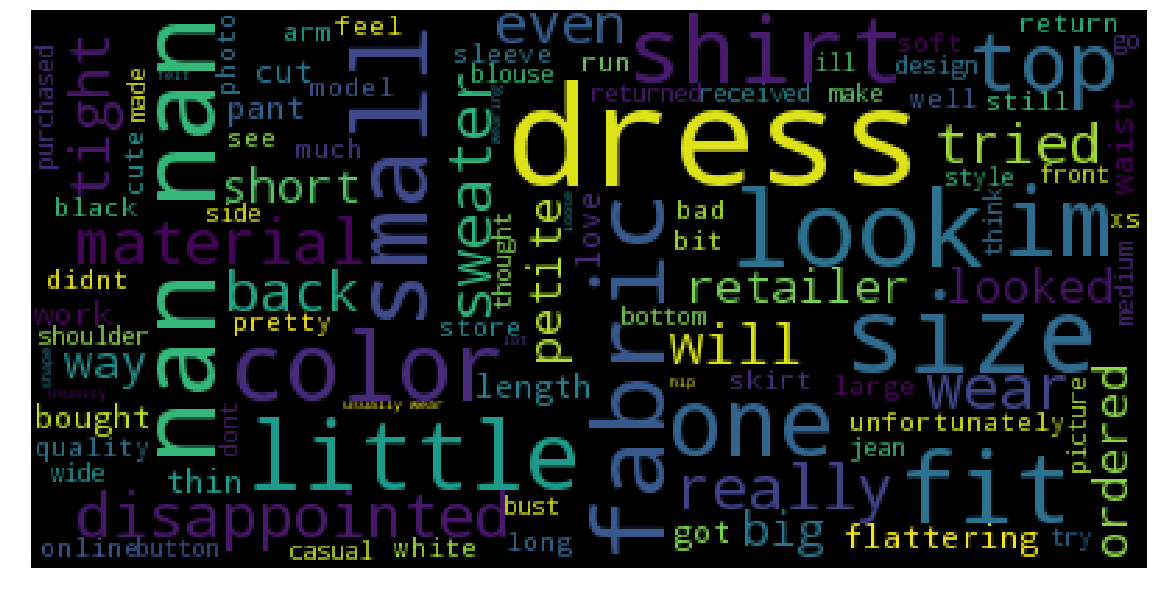

In [0]:
Word_1=review_polarity[reviews_plot=='negative']['reviews']
negative_words=pd.Series(x for x in Word_1 for i in x.split(x)).value_counts()
wc= WordCloud(background_color= 'black', max_font_size=50, max_words=100)
wc.generate(' '.join(Word_1))
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(wc)

In [0]:
input_count=list(train[(train['Rating']==1) | (train['Rating']==5)]['Review Text'])
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
x=CountVectorizer().fit_transform(input_count)
y=train[(train['Rating']==1) | (train['Rating']==5)]['Rating']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3)


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')
def analysis(model):  
  log=model()
  log.fit(x_train, y_train)
  y_pred=log.predict(x_test)
  score=accuracy_score(y_test, y_pred)
  return(score)

In [0]:
logistic= analysis(LogisticRegression)
print('logistic: ',logistic)
multi= analysis(MultinomialNB)
print('Multi: ',multi)


logistic:  0.9663645038167938
Multi:  0.9572996183206107


Do the same thing just by replacing the "**Rating**" with  "**Recommended IND**" and predict weather its Recommended or not.